In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv("API_EN.ATM.CO2E.KT_DS2_en_csv_v2_5871652.csv",  delimiter=',' , skiprows = 4) # make sure that the location is same as your directory
df = data.copy()

In [4]:
df.to_json(f'API_EN.ATM.CO2E.KT_DS2_en_csv_v2_5871652.json', orient='records')

In [4]:
# input the value of as given above
while True : 
    country_name = input('Enter a country name: ')

    if country_name in df['Country Name'].unique():
        break

    print(f'Country "{country_name}" not found in the dataset.')


Enter a country name: Nepal


In [5]:
country_data = df[df['Country Name'] == country_name].iloc[:, 5:-3]
country_data

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5199.2,5997.8,6087.8,7132.2,7186.2,10735.7,13265.3,15139.4,13860.5,14949.2


In [6]:
country_data = country_data.fillna(0)
country_data

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5199.2,5997.8,6087.8,7132.2,7186.2,10735.7,13265.3,15139.4,13860.5,14949.2


In [7]:
train_data = country_data.loc[:, '1961':'2016']
train_data

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2693.6,2994.9,3882.8,4640.9,5199.2,5997.8,6087.8,7132.2,7186.2,10735.7


In [8]:
# Transpose the DataFrame so that the years become rows and values become a single column
train_data_transposed = train_data.T.reset_index()
train_data_transposed.columns = ['Year', 'Value']

# Set 'Year' as the index
train_data_transposed['Year'] = pd.to_datetime(train_data_transposed['Year'], format='%Y')
train_data_transposed.set_index('Year', inplace=True)

train_data_transposed

,Value
Year,
1961-01-01,0.00
1962-01-01,0.00
1963-01-01,0.00
1964-01-01,0.00
1965-01-01,0.00
1966-01-01,0.00
1967-01-01,0.00
1968-01-01,0.00
1969-01-01,0.00


In [9]:
actual_values_df = country_data.loc[:, '2017':'2020']
actual_values_df = actual_values_df.T
actual_values_df.columns = ['Actual_Value']
actual_values_df.index = actual_values_df.index.astype('int32')
actual_values_df.index.name = 'Year'
actual_values_df

,Actual_Value
Year,
2017,13265.3
2018,15139.4
2019,13860.5
2020,14949.2


In [10]:
# Now, you have a univariate time series with the 'Value' column
train_data_series = train_data_transposed['Value']

# Train the ARIMA model
p, d, q = 1, 1, 1
model = ARIMA(train_data_series, order=(p, d, q))
model_fit = model.fit()

# Make predictions for the years 2017-2020
predictions = model_fit.predict(start='2017', end='2020', dynamic=False)
predictions = predictions.round(1)

# Print the predictions
# print(predictions)

E:\program_files\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
E:\program_files\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
E:\program_files\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [11]:
predictions_df = pd.DataFrame({'Date': predictions.index, 'Predicted_Value': predictions.values})
predictions_df['Year'] = pd.to_datetime(predictions_df['Date']).dt.year
predictions_df = predictions_df.drop(columns=['Date'])
predictions_df.set_index('Year', inplace=True)
predictions_df

,Predicted_Value
Year,
2017,11918.9
2018,13081.2
2019,14223.0
2020,15344.6


In [12]:
merged_df = predictions_df.join(actual_values_df, how= 'inner')
merged_df

,Predicted_Value,Actual_Value
Year,,
2017,11918.9,13265.3
2018,13081.2,15139.4
2019,14223.0,13860.5
2020,15344.6,14949.2


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(merged_df['Actual_Value'], merged_df['Predicted_Value'])
mse = mean_squared_error(merged_df['Actual_Value'], merged_df['Predicted_Value'])
rmse = np.sqrt(mse)

# Print the accuracy metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 1040.6249999999995
Root Mean Squared Error (RMSE): 1258.6428812415375


In [14]:
transposed_predicted = predictions_df.T
trained_data = pd.concat([train_data, transposed_predicted])
trained_data = trained_data.ffill().bfill()


trained_data.reset_index(drop=True, inplace=True)
trained_data = trained_data.iloc[0:1]
trained_data

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5199.2,5997.8,6087.8,7132.2,7186.2,10735.7,11918.9,13081.2,14223.0,15344.6


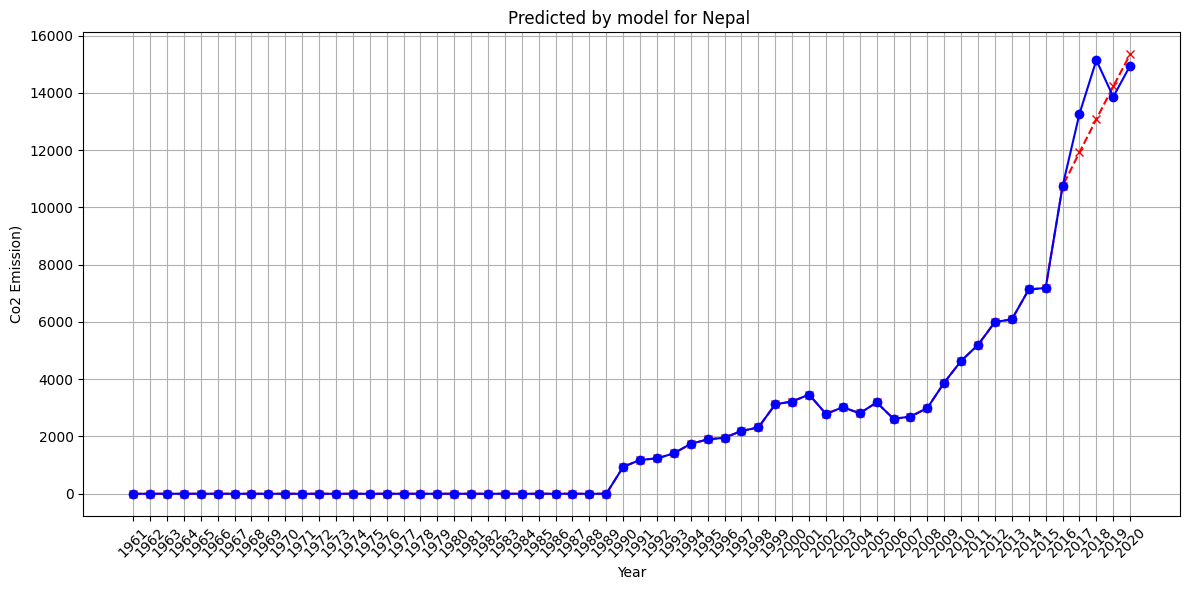

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

data_series = trained_data.iloc[0, :]
data_series_rounded = data_series.round(1)
data_series_rounded.index = data_series_rounded.index.astype(str)

# Creating plot
plt.figure(figsize=(12, 6))
plt.plot(data_series_rounded.index, data_series_rounded.values, marker='x', linestyle='--', color='red')
plt.plot(country_data.columns, country_data.values.squeeze(), marker='o', linestyle='-', color='blue')

plt.xlabel('Year')
plt.ylabel('Co2 Emission)')
plt.title('Predicted by model for Nepal ')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
country_data.to_csv(f'{country_name}_data.csv', index = False)

In [ ]:
trained_data.to_csv(f'{country_name}_predicted.csv', index = False)

In [ ]:
country_data.to_json(f'{country_name}_data.json', orient='records')

In [ ]:
trained_data.to_json(f'{country_name}_predicted.json', orient='records')